<a href="https://colab.research.google.com/github/okwasna/praca_inz/blob/main/klastrowanie_python26_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytanie danych, transpozycja danych(geny w kolumnach), zastapienie brakujących wartości medianą, obliczenie średnich i odchyleń standardowych(dla każdej kolumny-genów), skalowanie i centrowanie danych.

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Wczytanie danych z pliku CSV
data_path = 'test1 - LiverMale3600.csv'
data = pd.read_csv(data_path)

# Sprawdzenie poprawności wczytania danych
print("Nagłówki kolumn danych:", data.columns)
print("Pierwsze kilka wierszy danych:\n", data.head())
print("Rozmiar danych po wczytaniu:", data.shape)

# Ustawienie 'substanceBXH' jako indeks i usunięcie tej kolumny z danych
data.set_index('substanceBXH', inplace=True)

# Sprawdzenie poprawności ustawienia indeksu
print("Dane z ustawionym indeksem:\n", data.head())

# Zastąpienie brakujących wartości medianą
data_values_filled = data.fillna(data.median())

# Sprawdzenie, czy brakujące wartości zostały wypełnione
print("Liczba brakujących wartości po wypełnieniu medianą:\n", data_values_filled.isnull().sum().sum())

# Przypisanie danych z uzupełnioną medianą jako surowe dane
surowe_dane = data_values_filled

# Obliczenie średnich i odchyleń standardowych dla każdej kolumny (próbki)
means = surowe_dane.mean(axis=1)
stds = surowe_dane.std(axis=1)

# Skalowanie danych
scaled_data_values = (surowe_dane.sub(means, axis=0)).div(stds, axis=0)

# Funkcja do przeprowadzania klasteryzacji K-means
def perform_kmeans(data, k_range):
    kmeans_labels = {}
    centers = {}
    silhouette_scores = {}
    kmeans_results = data.copy()

    for k in k_range:
        print(f"\nPerforming K-means for k={k}")
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        centers[k] = kmeans.cluster_centers_

        print(f"Number of labels: {len(labels)}")
        print(f"Number of rows: {len(data)}")

        # Sprawdzanie zgodności indeksów
        if len(labels) != len(data.index):
            print(f"Error: Number of labels ({len(labels)}) does not match number of rows ({len(data.index)}) for k={k}")

        # Debugowanie indeksów
        print("Data index:", data.index[:10])
        print("Labels:", labels[:10])

        # Przypisanie etykiet
        kmeans_results[f'KMeans_{k}_clusters'] = pd.Series(labels, index=data.index)
        kmeans_labels[k] = labels
        silhouette_scores[k] = silhouette_avg

        print(f"Liczba klastrów: {k}, Silhouette Score: {silhouette_avg}")

    return kmeans_labels, centers, silhouette_scores, kmeans_results

# Klasteryzacja po genach na surowych danych
print("K-means na surowych danych:")
surowe_k_labels, surowe_centers, surowe_sil_scores, surowe_results = perform_kmeans(surowe_dane, range(10, 16))

# Klasteryzacja po genach na skalowanych danych
print("K-means na skalowanych danych:")
scaled_k_labels, scaled_centers, scaled_sil_scores, scaled_results = perform_kmeans(scaled_data_values, range(10, 16))

# Wyświetlanie liczby punktów w każdym klastrze
def display_cluster_info(k_labels, k_range):
    for k in k_range:
        print(f"\nLiczba klastrów: {k}")
        unique, counts = np.unique(k_labels[k], return_counts=True)
        print(f"Liczba punktów w każdym klastrze: {dict(zip(unique, counts))}")

display_cluster_info(surowe_k_labels, range(10, 16))
display_cluster_info(scaled_k_labels, range(10, 16))

# Wyświetlenie wyników
print("Dane surowe z wynikami k-means: \n", surowe_results.head())
print("Dane skalowane z wynikami k-means: \n", scaled_results.head())


Nagłówki kolumn danych: Index(['substanceBXH', 'F2_4', 'F2_5', 'F2_6', 'F2_7', 'F2_8', 'F2_9', 'F2_10',
       'F2_13', 'F2_16',
       ...
       'F2_294', 'F2_295', 'F2_313', 'F2_314', 'F2_315', 'F2_316', 'F2_317',
       'F2_318', 'F2_343', 'F2_353'],
      dtype='object', length=125)
Pierwsze kilka wierszy danych:
   substanceBXH    F2_4    F2_5    F2_6     F2_7    F2_8     F2_9     F2_10  \
0  MMT00000044 -0.0444 -0.0179 -0.0431  0.03580  0.0263  0.15400  0.000109   
1  MMT00000046  0.1250  0.0507  0.1290  0.13900  0.2370 -0.00483  0.007490   
2  MMT00000051 -0.1510 -0.0689 -0.0925  0.00353 -0.1610 -0.00932 -0.191000   
3  MMT00000076 -0.1650 -0.0285  2.0000  0.04570 -0.4550  0.33200  0.043500   
4  MMT00000080 -0.0724 -0.0603 -0.0569  0.02610 -0.1130 -0.01210 -0.161000   

    F2_13   F2_16  ...    F2_294   F2_295   F2_313   F2_314  F2_315    F2_316  \
0  0.0254 -0.0294  ...  0.048735  0.01950  0.00240 -0.09950 -0.0872 -0.103662   
1  0.0227  0.0355  ... -0.022034 -0.01470  0.197

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [3 0 8 0 3 8 7 3 3 3]
Liczba klastrów: 10, Silhouette Score: 0.09299303791907859

Performing K-means for k=11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 6  4  1  4  6  3 10  6  6  6]
Liczba klastrów: 11, Silhouette Score: 0.0909661096009148

Performing K-means for k=12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [11  8  2  8 11  6  0 11 11 11]
Liczba klastrów: 12, Silhouette Score: 0.09265837820466062

Performing K-means for k=13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 1  2 10  2  1  9  5  8  1  1]
Liczba klastrów: 13, Silhouette Score: 0.09184126415904807

Performing K-means for k=14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 3  5 10 13  3  7  6  9  3  9]
Liczba klastrów: 14, Silhouette Score: 0.08493461283169998

Performing K-means for k=15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 7  0 12  0  7  1  9  6  7  7]
Liczba klastrów: 15, Silhouette Score: 0.08678565993369441
K-means na skalowanych danych:

Performing K-means for k=10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [8 0 1 8 2 1 6 8 2 0]
Liczba klastrów: 10, Silhouette Score: 0.09946514633263219

Performing K-means for k=11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 4 10  9  4  2  3  6  1  2 10]
Liczba klastrów: 11, Silhouette Score: 0.0984521839255965

Performing K-means for k=12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 1  5  3  1 11  3 10  8 11  5]
Liczba klastrów: 12, Silhouette Score: 0.10489250682304294

Performing K-means for k=13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 9  6  3  9 10 11  2 12 10  6]
Liczba klastrów: 13, Silhouette Score: 0.10658963994309581

Performing K-means for k=14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 0 13  3  0  2 11  7  9  2 13]
Liczba klastrów: 14, Silhouette Score: 0.10997907576454628

Performing K-means for k=15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of labels: 3600
Number of rows: 3600
Data index: Index(['MMT00000044', 'MMT00000046', 'MMT00000051', 'MMT00000076',
       'MMT00000080', 'MMT00000102', 'MMT00000149', 'MMT00000159',
       'MMT00000207', 'MMT00000212'],
      dtype='object', name='substanceBXH')
Labels: [ 7  1 11  7 12  2  0  5 12  1]
Liczba klastrów: 15, Silhouette Score: 0.10953052527378838

Liczba klastrów: 10
Liczba punktów w każdym klastrze: {0: 517, 1: 7, 2: 19, 3: 928, 4: 41, 5: 92, 6: 278, 7: 383, 8: 756, 9: 579}

Liczba klastrów: 11
Liczba punktów w każdym klastrze: {0: 41, 1: 762, 2: 7, 3: 231, 4: 549, 5: 257, 6: 757, 7: 14, 8: 577, 9: 46, 10: 359}

Liczba klastrów: 12
Liczba punktów w każdym klastrze: {0: 368, 1: 7, 2: 750, 3: 572, 4: 14, 5: 41, 6: 237, 7: 254, 8: 536, 9: 31, 10: 24, 11: 766}

Liczba klastrów: 13
Liczba punktów w każdym klastrze: {0: 118, 1: 760, 2: 459, 3: 7, 4: 364, 5: 377, 6: 25, 7: 14, 8: 482, 9: 194, 10: 738, 11: 22, 12: 40}

Liczba klastrów: 14
Liczba punktów w każdym klastrze:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


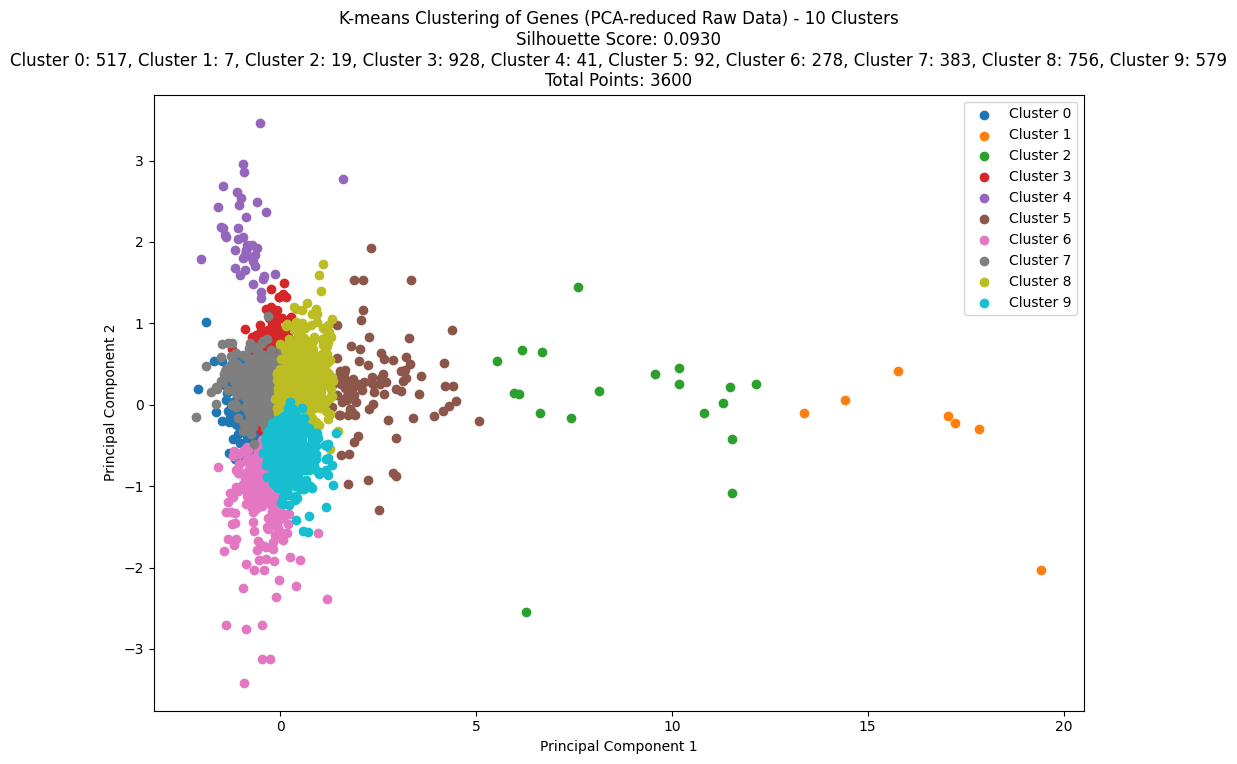

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


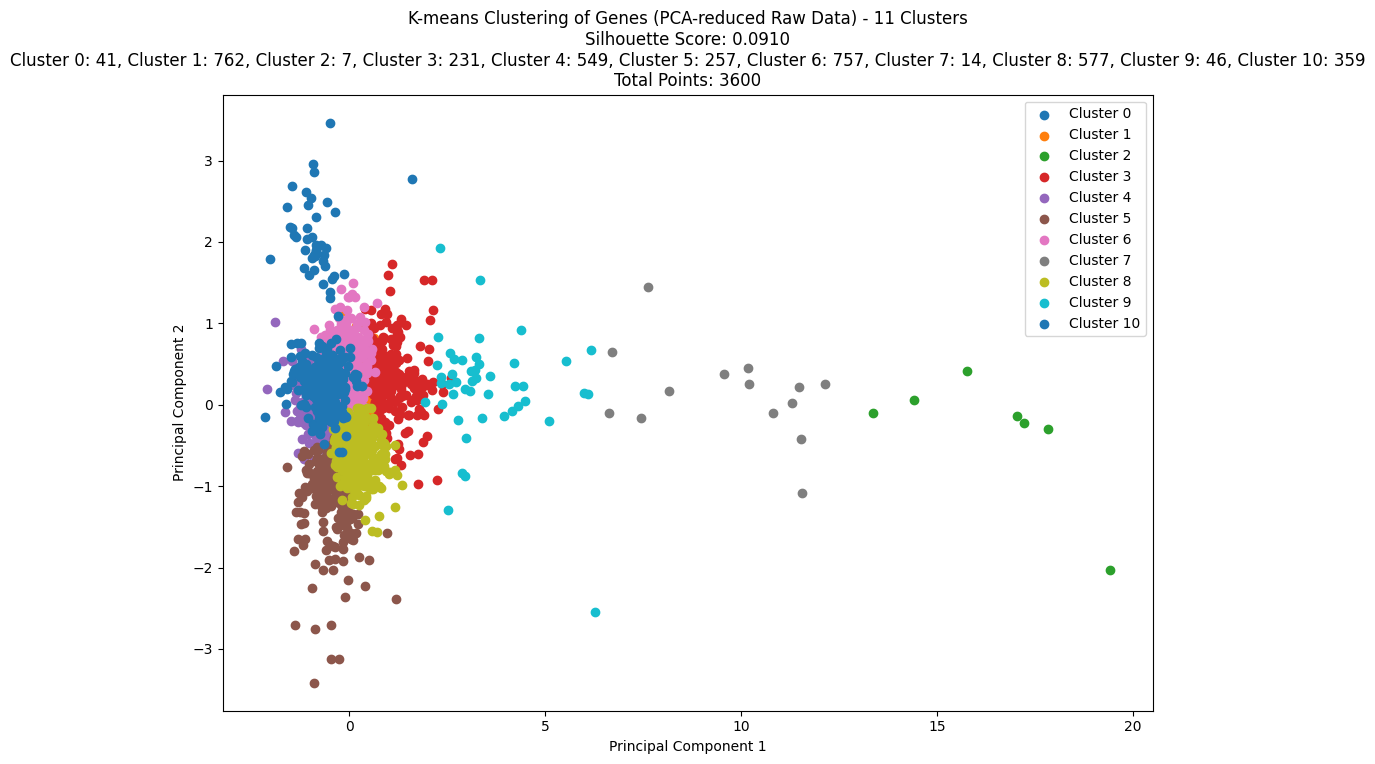

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


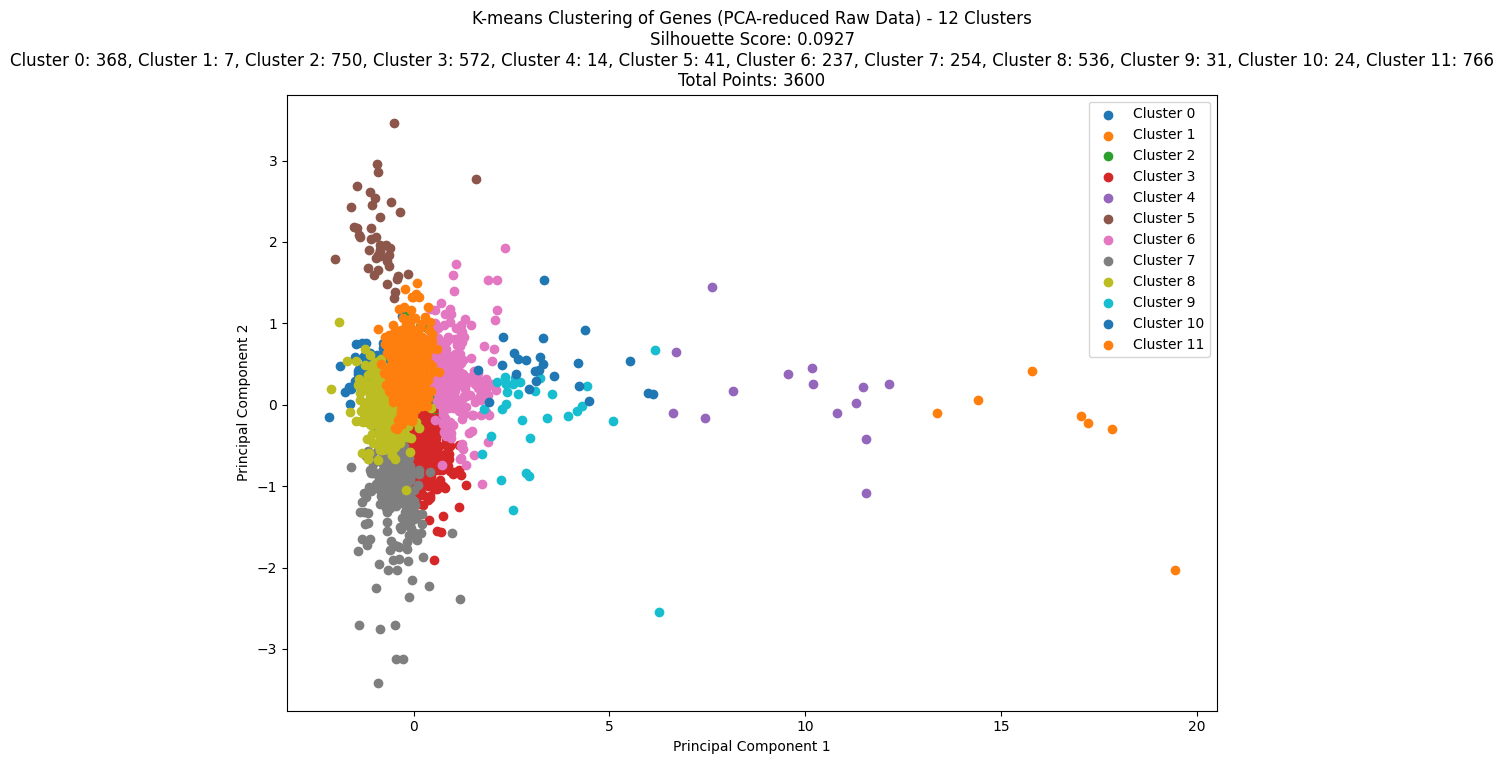

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


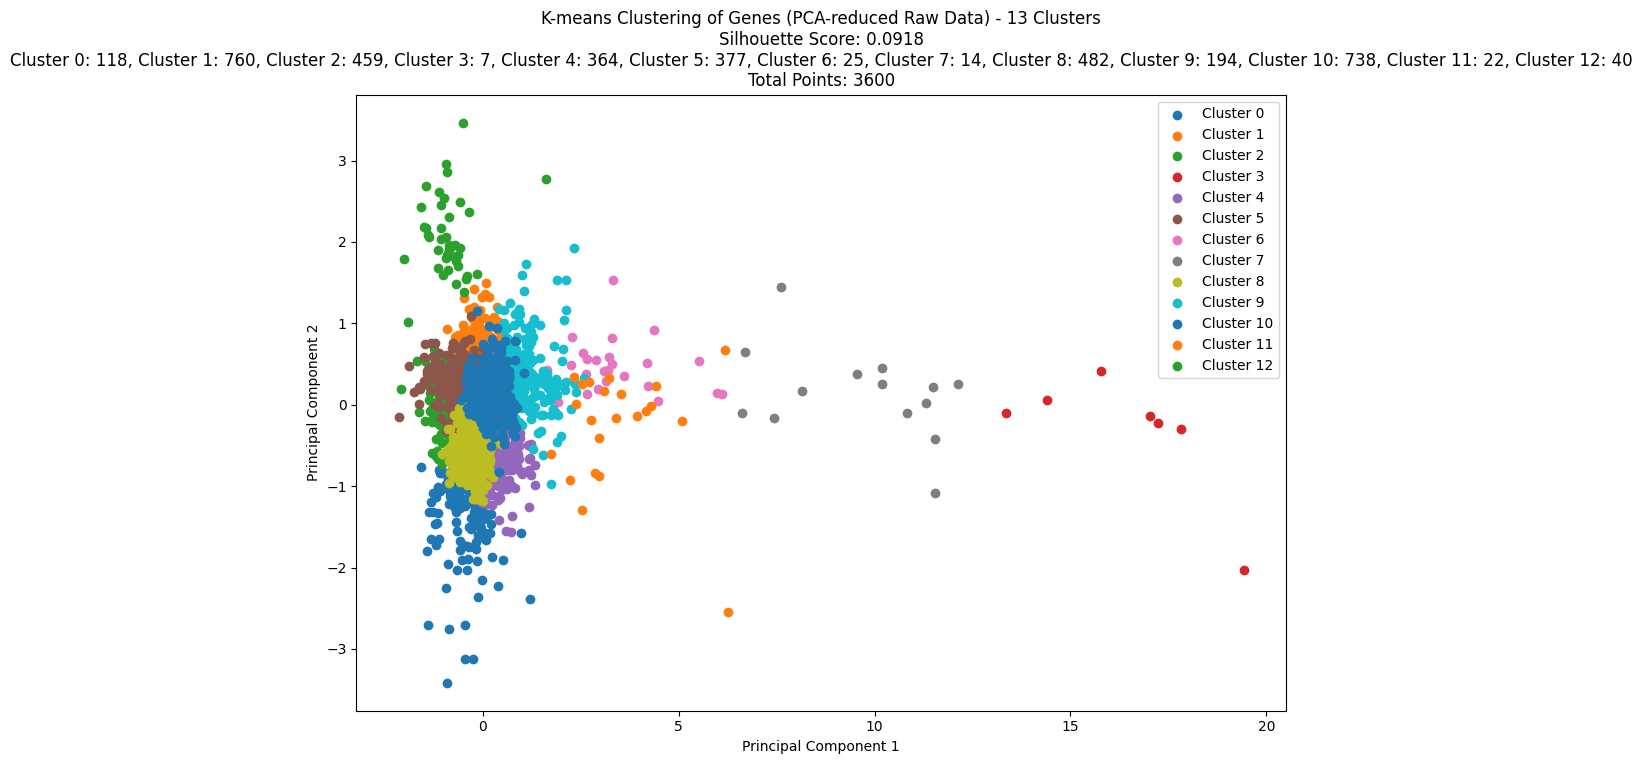

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


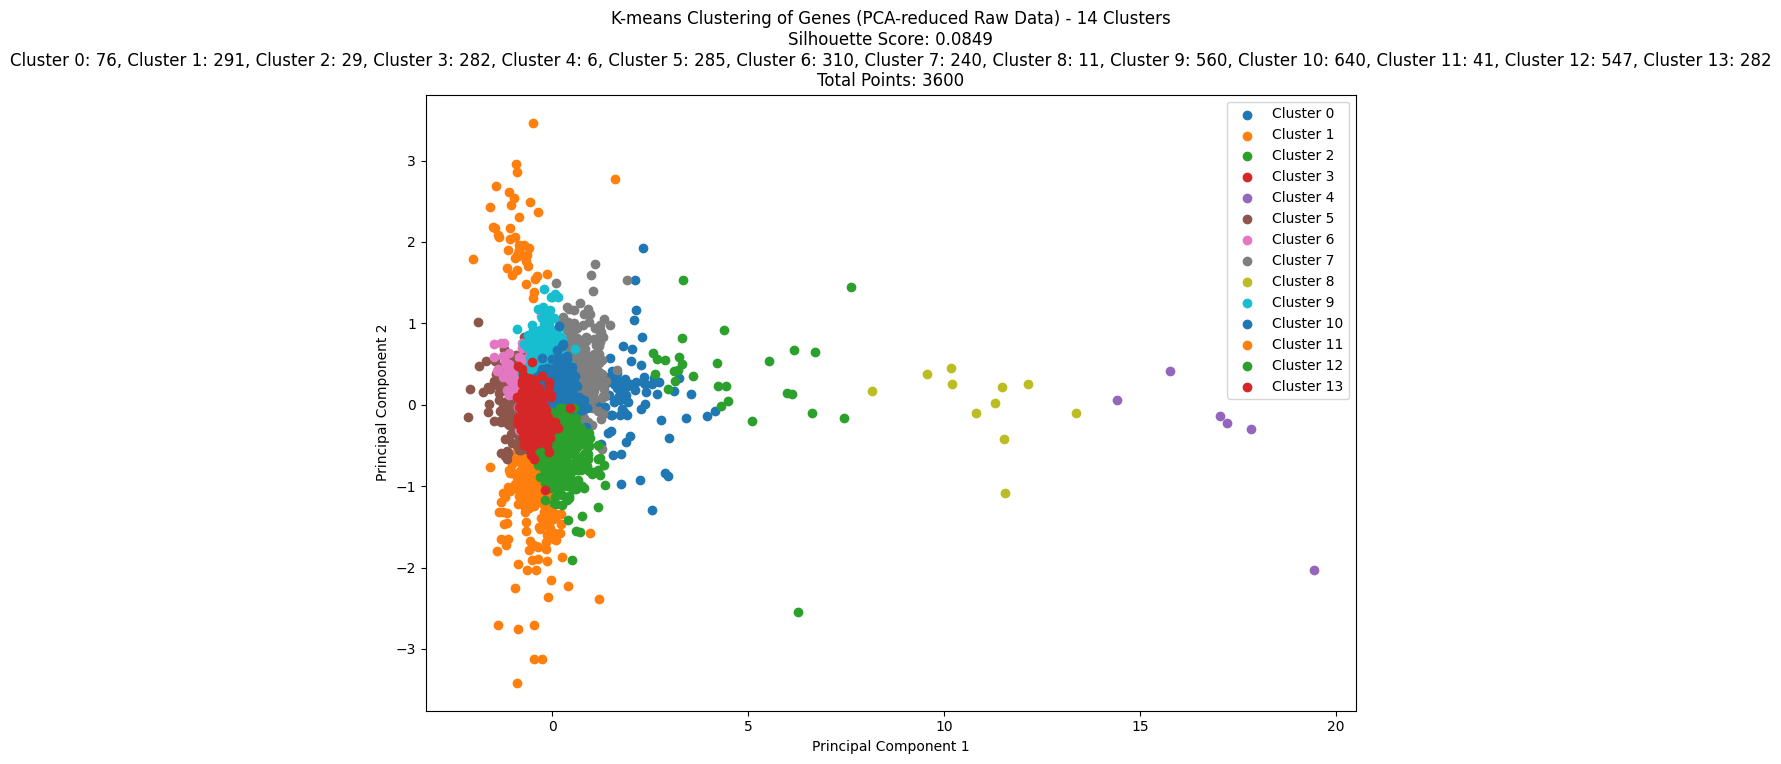

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


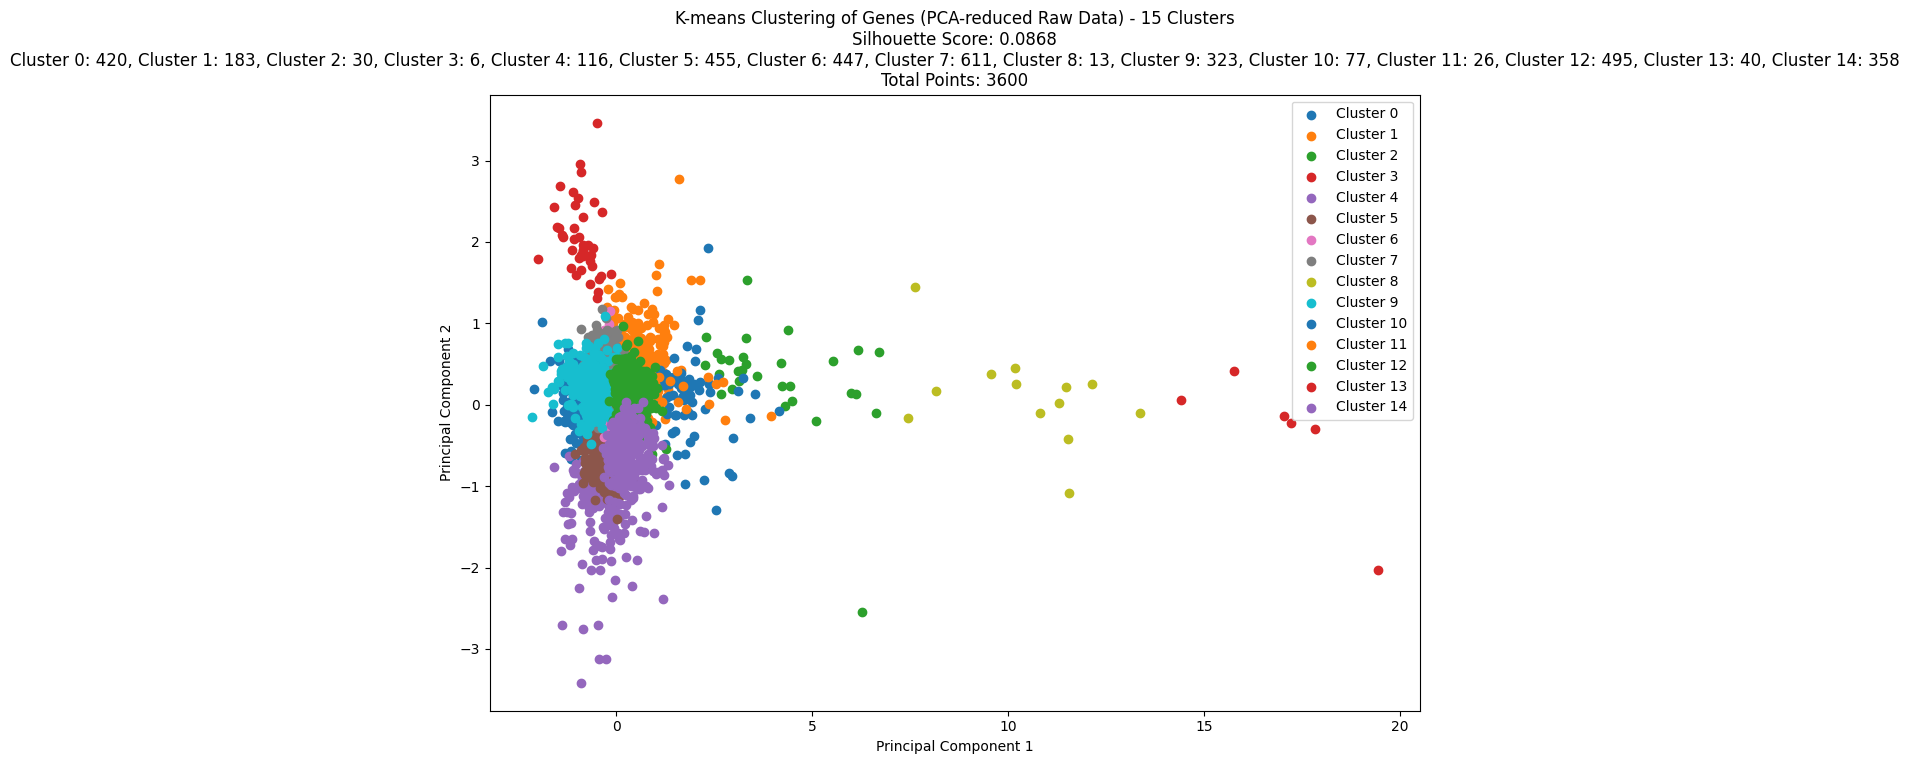

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


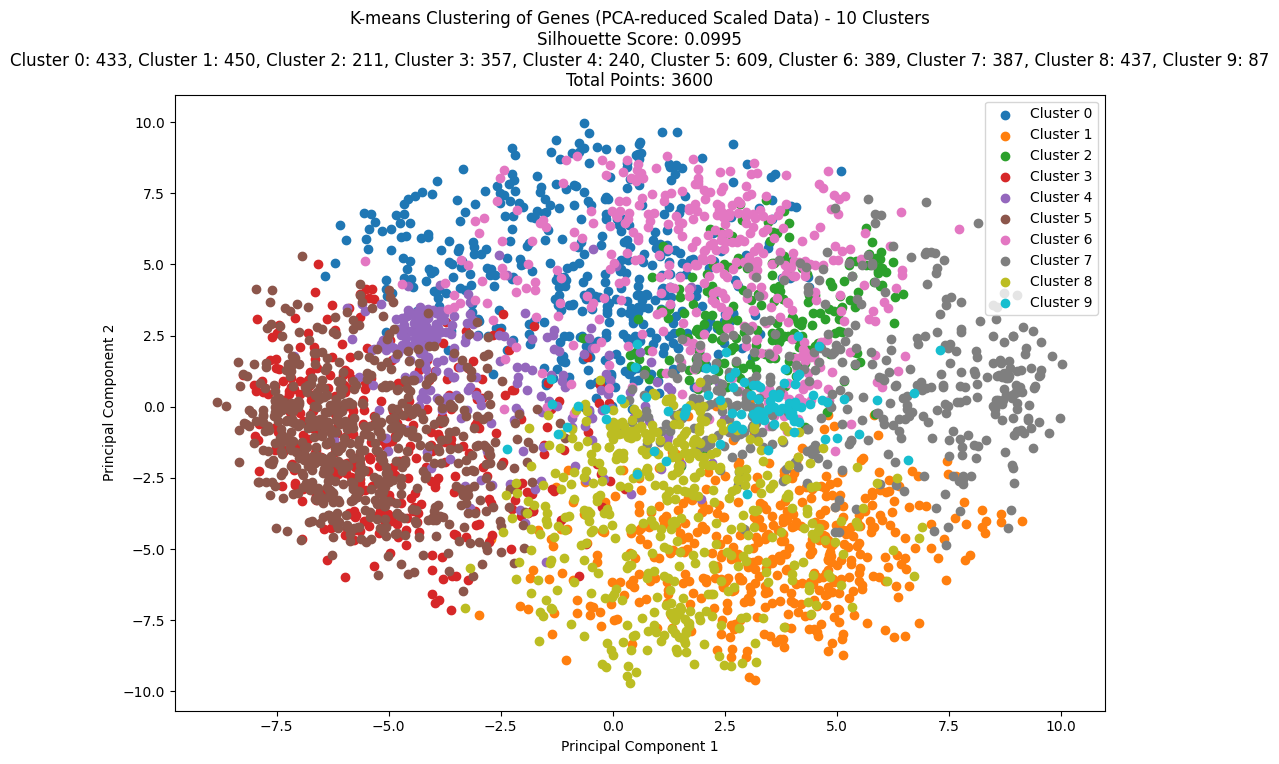

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


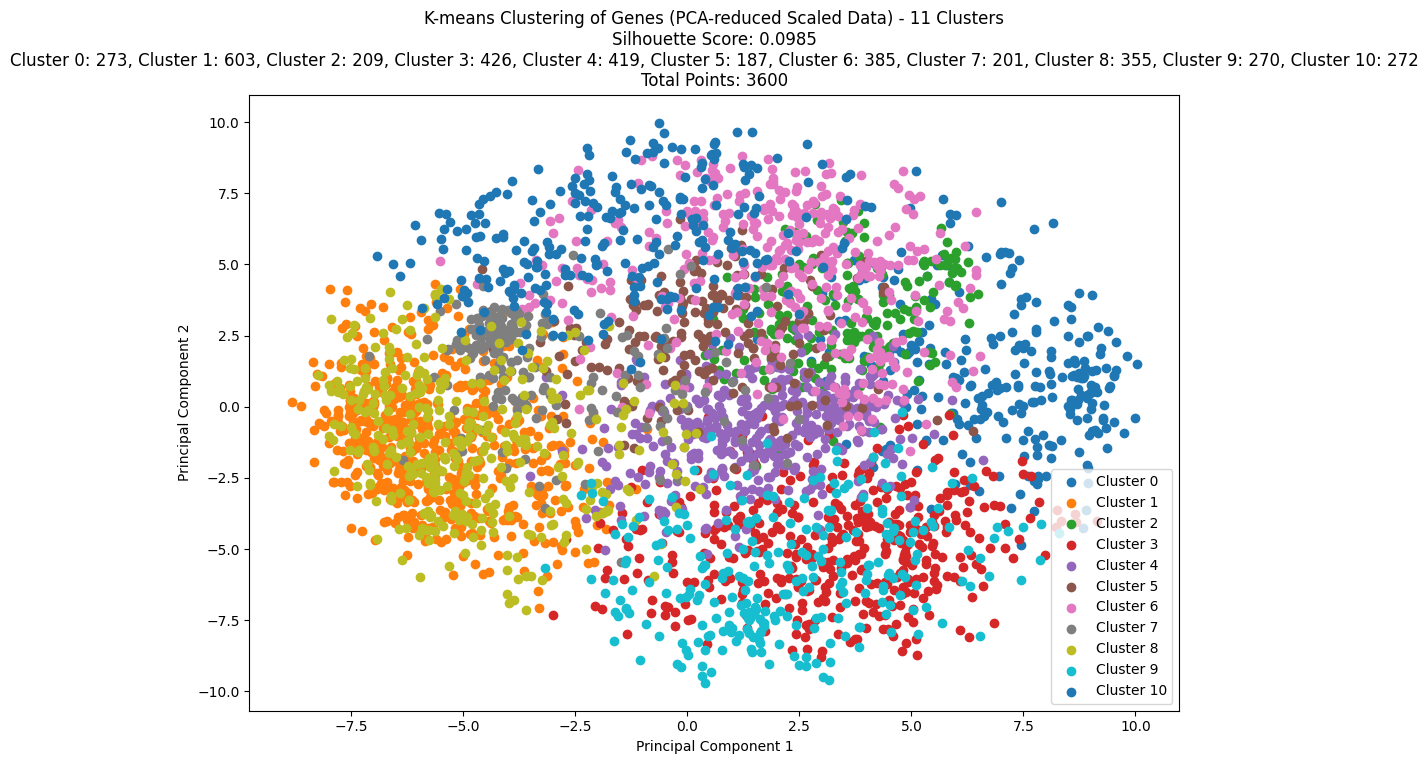

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


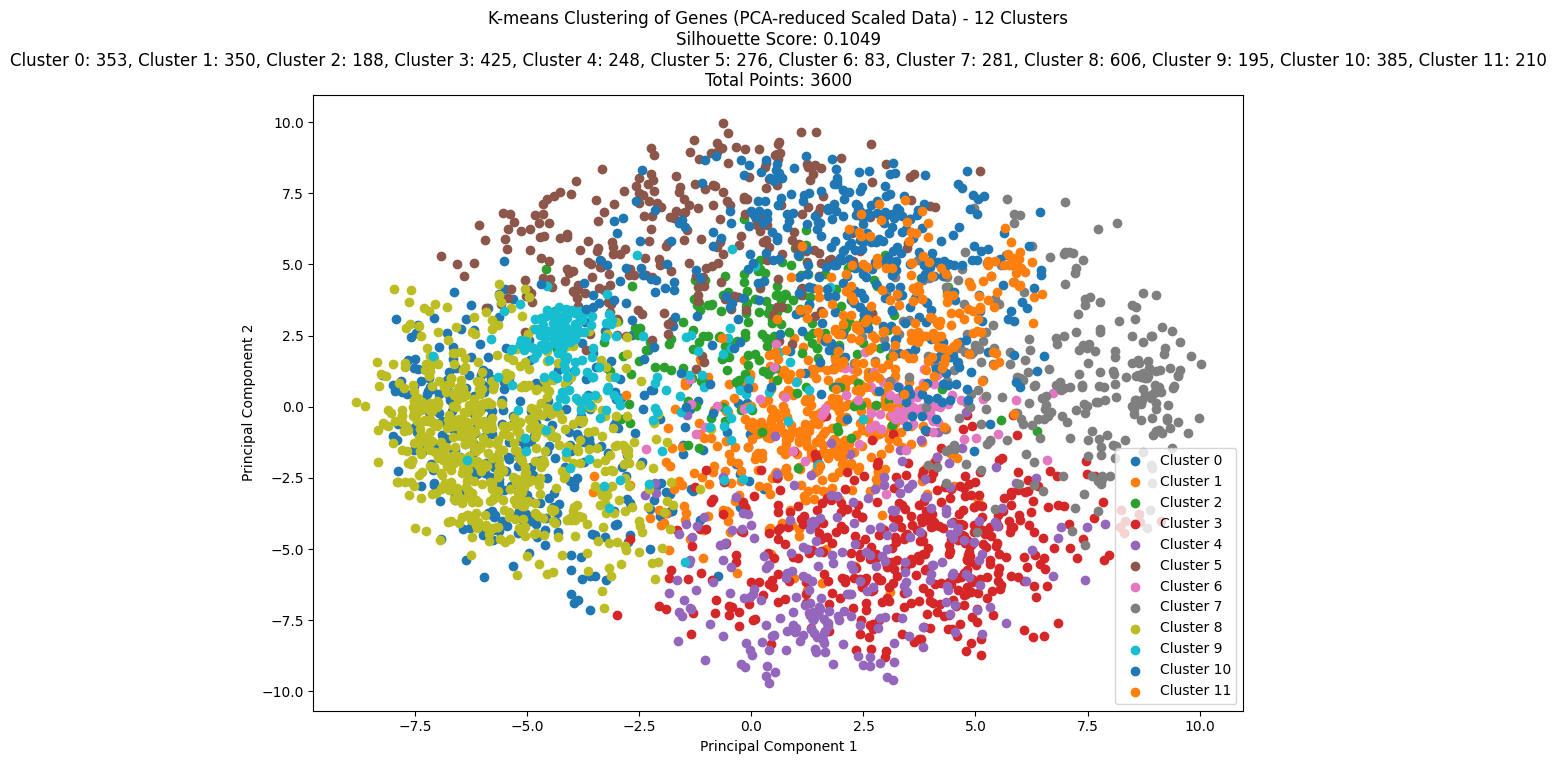

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


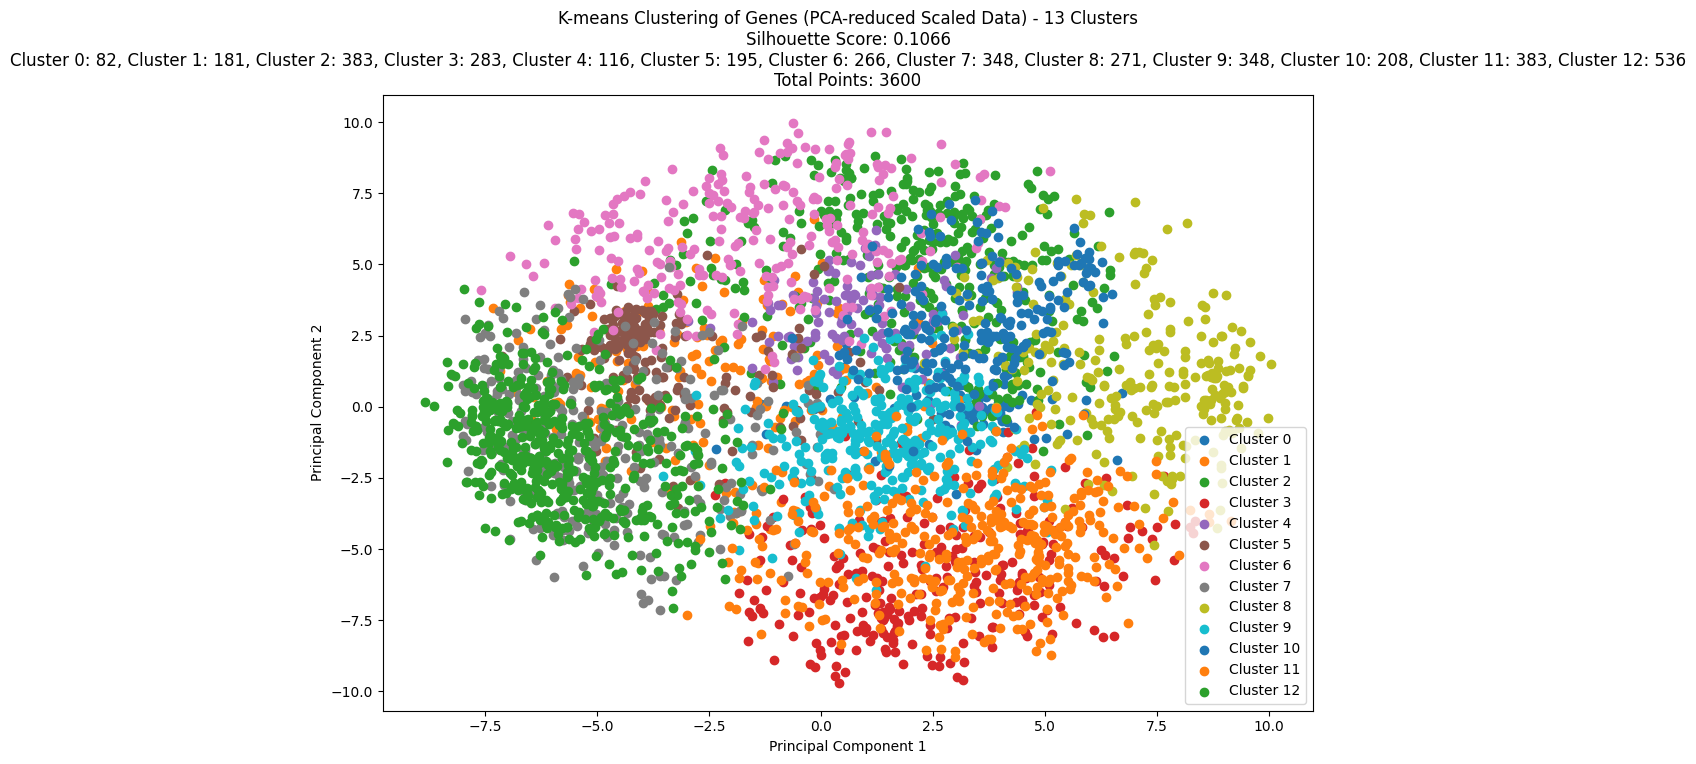

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


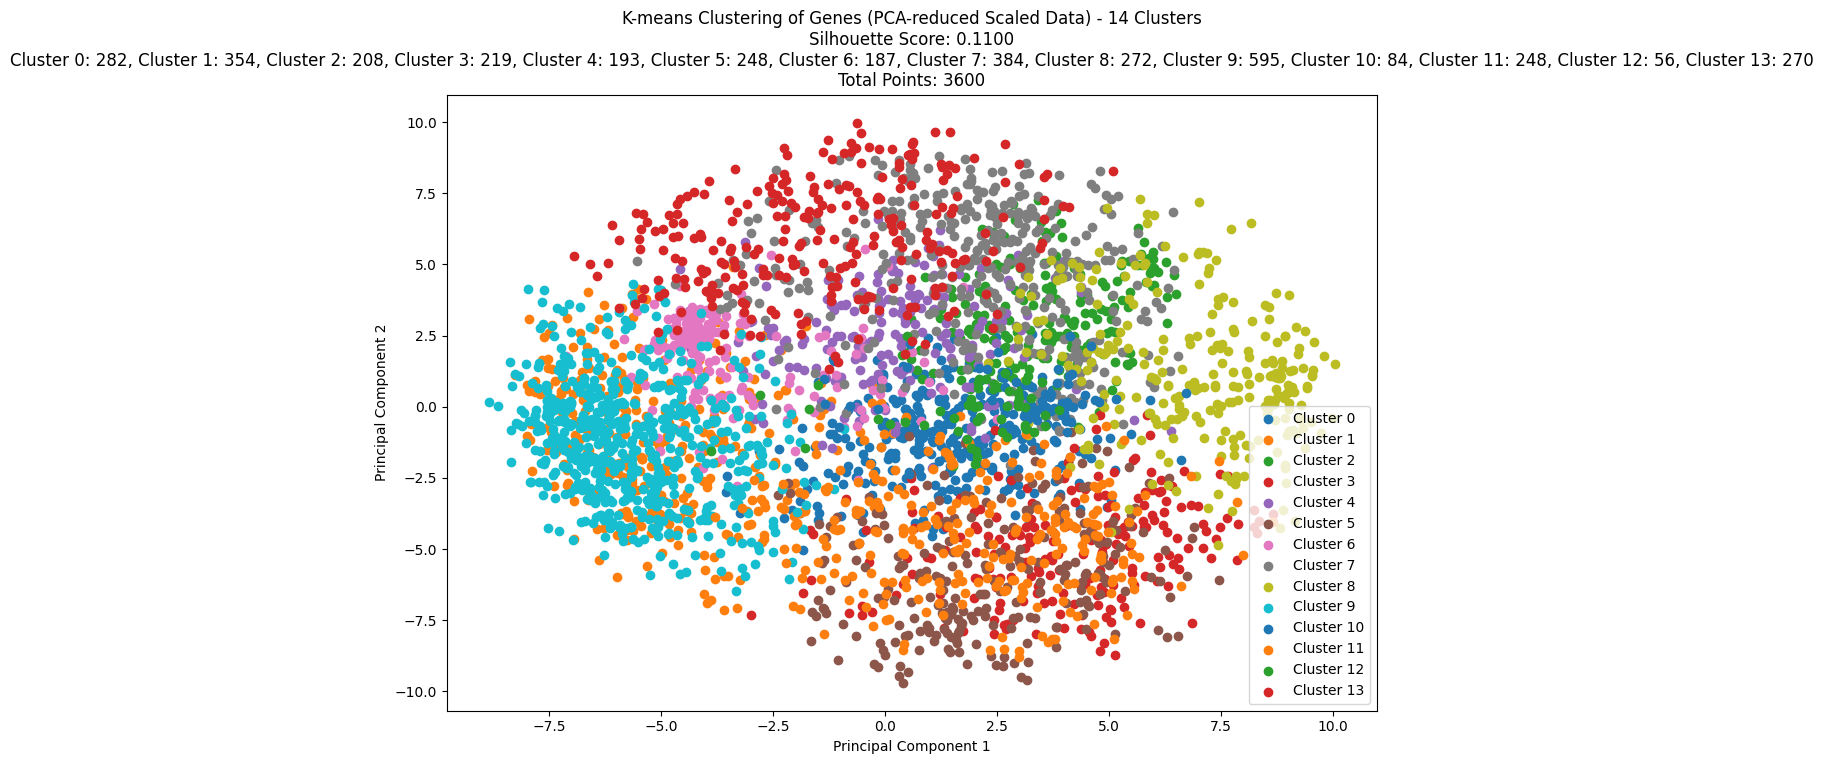

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


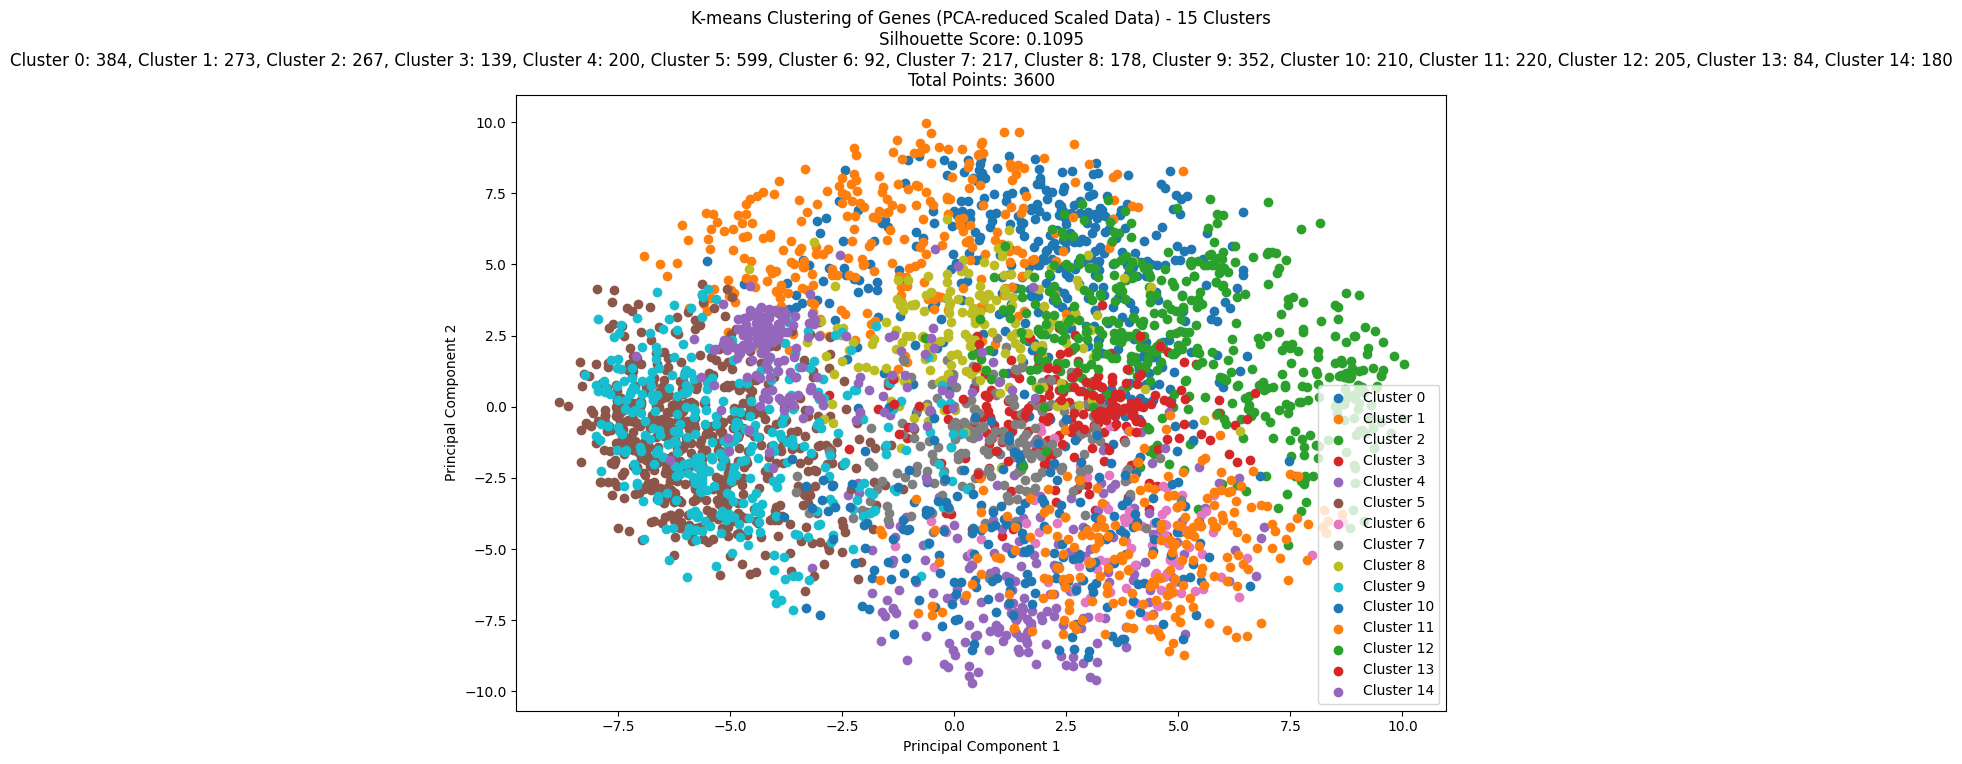

In [26]:
# Redukcja wymiarów przy użyciu PCA
pca_surowe = PCA(n_components=2)
reduced_data_surowe = pca_surowe.fit_transform(surowe_dane)

pca_scaled = PCA(n_components=2)
reduced_data_scaled = pca_scaled.fit_transform(scaled_data_values)

# Funkcja do tworzenia wykresów
def plot_kmeans_clustering(data, reduced_data, title_prefix):
    for k in range(10, 16):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)

        # Obliczanie liczby punktów w każdym klastrze
        unique, counts = np.unique(labels, return_counts=True)
        cluster_info = dict(zip(unique, counts))
        cluster_info_str = ", ".join([f"Cluster {key}: {value}" for key, value in cluster_info.items()])
        total_points = sum(counts)

        # Wykres wyników klasteryzacji
        plt.figure(figsize=(12, 8))
        for i in range(k):
            cluster_points = reduced_data[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

        plt.title(f'{title_prefix} - {k} Clusters\nSilhouette Score: {silhouette_avg:.4f}\n{cluster_info_str}\nTotal Points: {total_points}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.show()

# Wykresy wyników klasteryzacji dla surowych danych
plot_kmeans_clustering(surowe_dane, reduced_data_surowe, 'K-means Clustering of Genes (PCA-reduced Raw Data)')

# Wykresy wyników klasteryzacji dla skalowanych danych
plot_kmeans_clustering(scaled_data_values, reduced_data_scaled, 'K-means Clustering of Genes (PCA-reduced Scaled Data)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 has 517 samples, skipping heatmap generation.


NameError: name 'silhouette_avg' is not defined

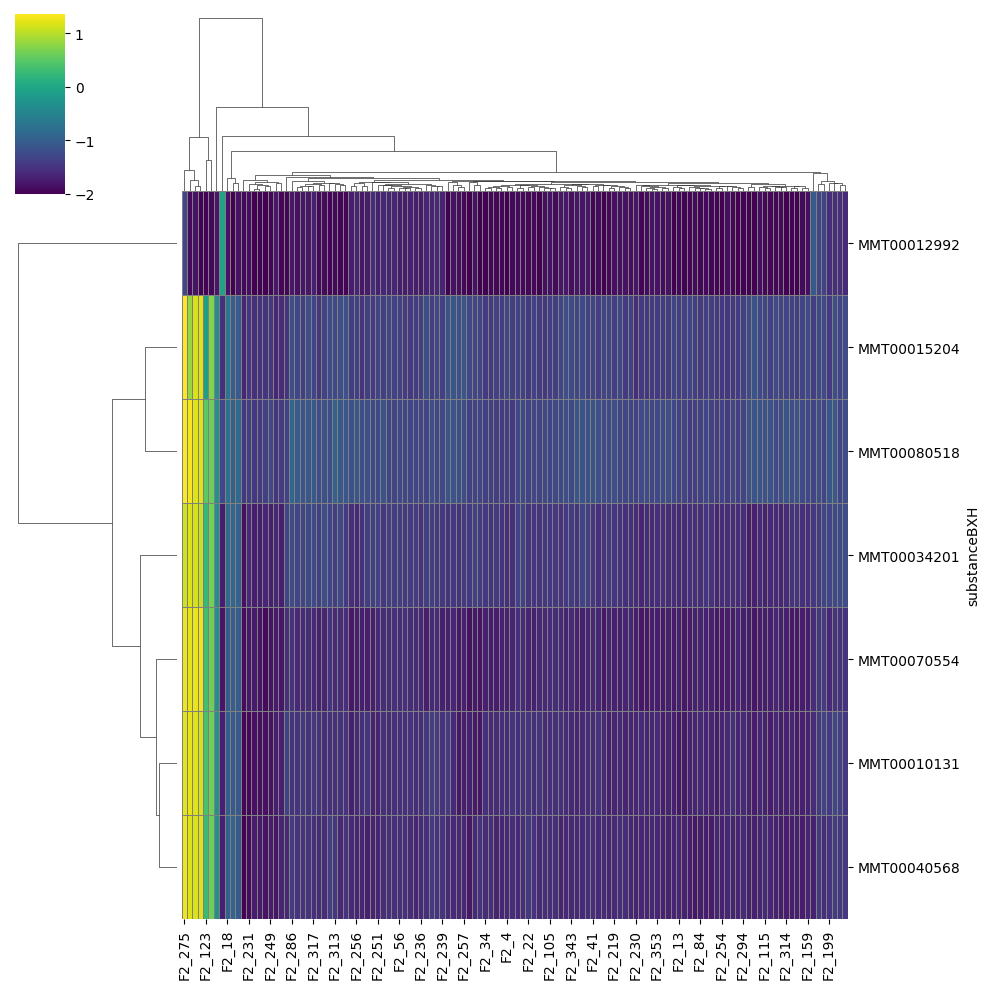

In [30]:

# Klasteryzacja K-means na surowych danych
kmeans = KMeans(n_clusters=10, random_state=0).fit(surowe_dane)
labels = kmeans.labels_

# Dodanie etykiet klastrów do danych
surowe_dane_kmeans = surowe_dane.copy()
surowe_dane_kmeans['Cluster'] = labels

# Obliczenie ogólnego Silhouette Score
overall_silhouette_avg = silhouette_score(surowe_dane, labels)

# Tworzenie heatmapy dla każdego klastra z użyciem clustermap
for cluster in range(10):
    cluster_data = surowe_dane_kmeans[surowe_dane_kmeans['Cluster'] == cluster]
    cluster_data = cluster_data.drop(columns=['Cluster'])

    # Obliczanie dodatkowych informacji
    num_samples = cluster_data.shape[0]

    # Sprawdzenie, czy klaster jest mniejszy niż 300 próbek
    if num_samples > 300:
        print(f'Cluster {cluster} has {num_samples} samples, skipping heatmap generation.')
        continue

    mean_values = cluster_data.mean().mean()
    std_values = cluster_data.std().mean()

    # Obliczenie Silhouette Score dla klastrów z więcej niż jedną próbką

    sns.clustermap(cluster_data, cmap='viridis', linewidths=.5, linecolor='gray', method='average')
    plt.title(f'Heatmap for Cluster {cluster}\n'
              f'Number of samples: {num_samples}\n'
              f'Mean of means: {mean_values:.2f}, Std of means: {std_values:.2f}\n'
              f'Silhouette Score: {silhouette_avg:.4f}')
    plt.show()
    #polaczenie z baza danych, aby szukac wspolnych terminow, czy nasze grupy genow sa jakies polaczone z jakims terminem np za opoptoze komrek ten klaster odpowiada, szukamy czy mamy nadinterpetacje jakiegos terminu, np ze to jest zwiazane ze stesem solnym, np 300 genow z czego 100 jest zwiazane z nadintereptacj
    #najwazniejsze to polaczenie i poszukani grup  z terminami
    #sill dla kazdego klastra
    #wizualizacje do 100